# Decision Trees and Random Forests Regressors Notebook
--------------------------
In this notebook, we would use IceCreamData.csv for the regression part.
It contains data of one feature, the tempreture, and the prediction is the average revenue of the day.

## Step 1: Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Step 2: Read & Clean Data (if needed)

In [2]:
df = pd.read_csv('IceCreamData.csv')
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [3]:
df = df.dropna()
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
# It doesn't matter if there is strings even in decision trees, as in the example we illustrated
df.dtypes

Temperature    float64
Revenue        float64
dtype: object

## Step 3: Data Splitting

In [5]:
X = df['Temperature']
Y = df['Revenue']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

X_train = np.expand_dims(X_train, axis=1)
print(X_train.shape)
X_test = np.expand_dims(X_test, axis=1)
print(X_test.shape)
print(X_test.dtype)

(375, 1)
(125, 1)
float64


## Step 4: Building the model & Training it

### 4.1: Decision Trees

In [7]:
# if max depth is not defined, the branches are split till they are pure or they are less than the min_samples_split value, which has default of 2
DT_model = DecisionTreeRegressor()
DT_model = DT_model.fit(X_train, Y_train)

### 4.2: Random Forests

In [8]:
RF_model = RandomForestRegressor(n_estimators=100)
RF_model = RF_model.fit(X_train, Y_train)

## Step 5: Test the model & evaluate

### 5.1: Decision Tree Accuracy

In [9]:
DT_accuracy = DT_model.score(X_test, Y_test)
print("Accuracy = %.2f" % (DT_accuracy * 100), '%', sep='')

Accuracy = 96.43%


### 5.2: Random Forest Accuracy

In [10]:
RF_accuracy = RF_model.score(X_test, Y_test)
print("Accuracy = %.2f" % (RF_accuracy * 100), '%', sep='')

Accuracy = 97.17%


## (Extra) Step 6: Visualize Results

### 6.1: Decision Tree Prediction Plot

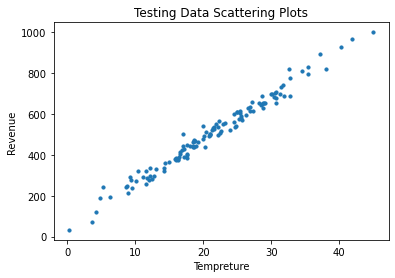

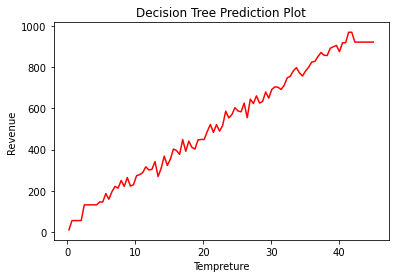

In [11]:
plt.scatter(X_test, Y_test, s=10)
plt.xlabel('Tempreture')
plt.ylabel('Revenue')
plt.title('Testing Data Scattering Plots')
plt.show()

X_range = np.linspace(min(X_test), max(X_test), 100)
Y_pred = DT_model.predict(X_range)
plt.plot(X_range, Y_pred, color='red')
plt.xlabel('Tempreture')
plt.ylabel('Revenue')
plt.title('Decision Tree Prediction Plot')
plt.show()

### 6.2: Random Forest Prediction Plot

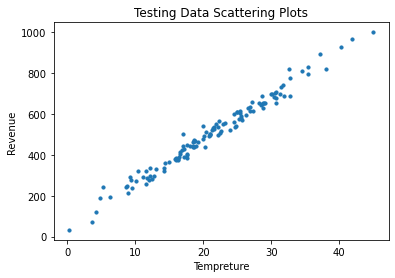

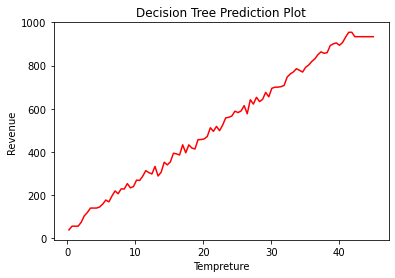

In [12]:
plt.scatter(X_test, Y_test, s=10)
plt.xlabel('Tempreture')
plt.ylabel('Revenue')
plt.title('Testing Data Scattering Plots')
plt.show()

X_range = np.linspace(min(X_test), max(X_test), 100)
Y_pred = RF_model.predict(X_range)
plt.plot(X_range, Y_pred, color='red')
plt.xlabel('Tempreture')
plt.ylabel('Revenue')
plt.title('Decision Tree Prediction Plot')
plt.show()

## (Extra) Visualizing the Decision Tree

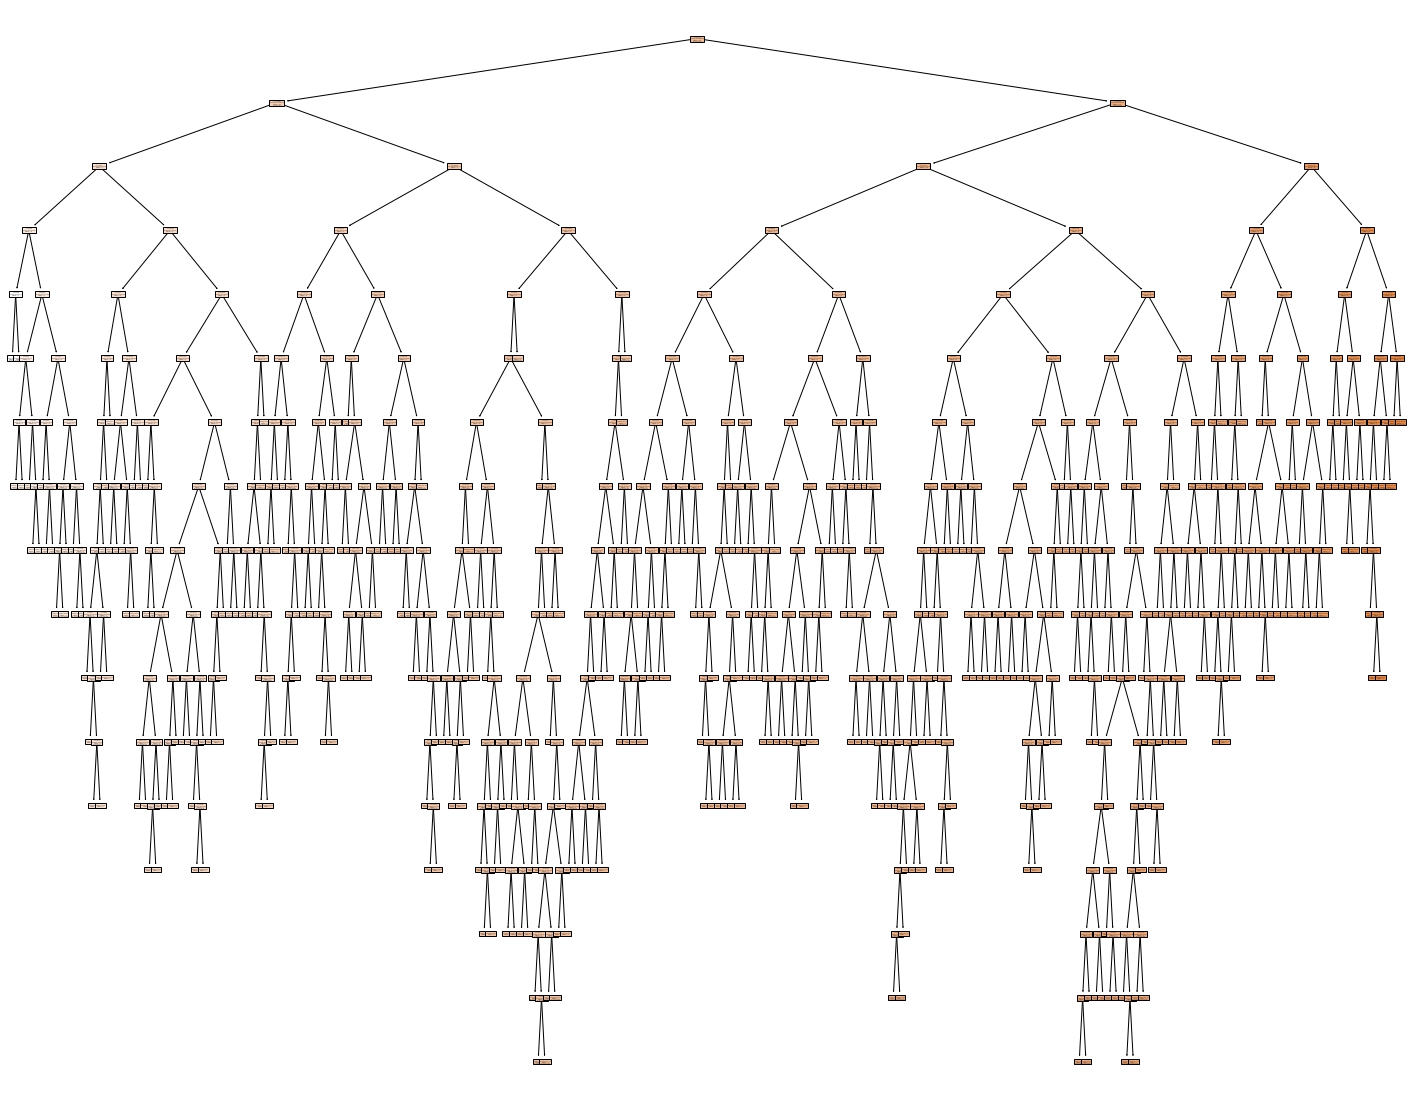

In [13]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(DT_model, 
                   feature_names='Tempreture',  
                   class_names='Revenue',
                   filled=True)
fig.savefig("decistion_tree.png")

-------------------
## DO NOT FORGET!!
--------------------
You can limit the tree constructed in either the decision tree or the random forest by setting ```max_depth``` parameter in the model initialization with any number you want.

For example, to limit the decision tree to 3 levels...

In [14]:
DT_model = DecisionTreeRegressor(max_depth=3)
DT_model = DT_model.fit(X_train, Y_train)
DT_accuracy = DT_model.score(X_test, Y_test)
print("Accuracy = %.2f" % (DT_accuracy * 100), '%', sep='')

Accuracy = 94.26%


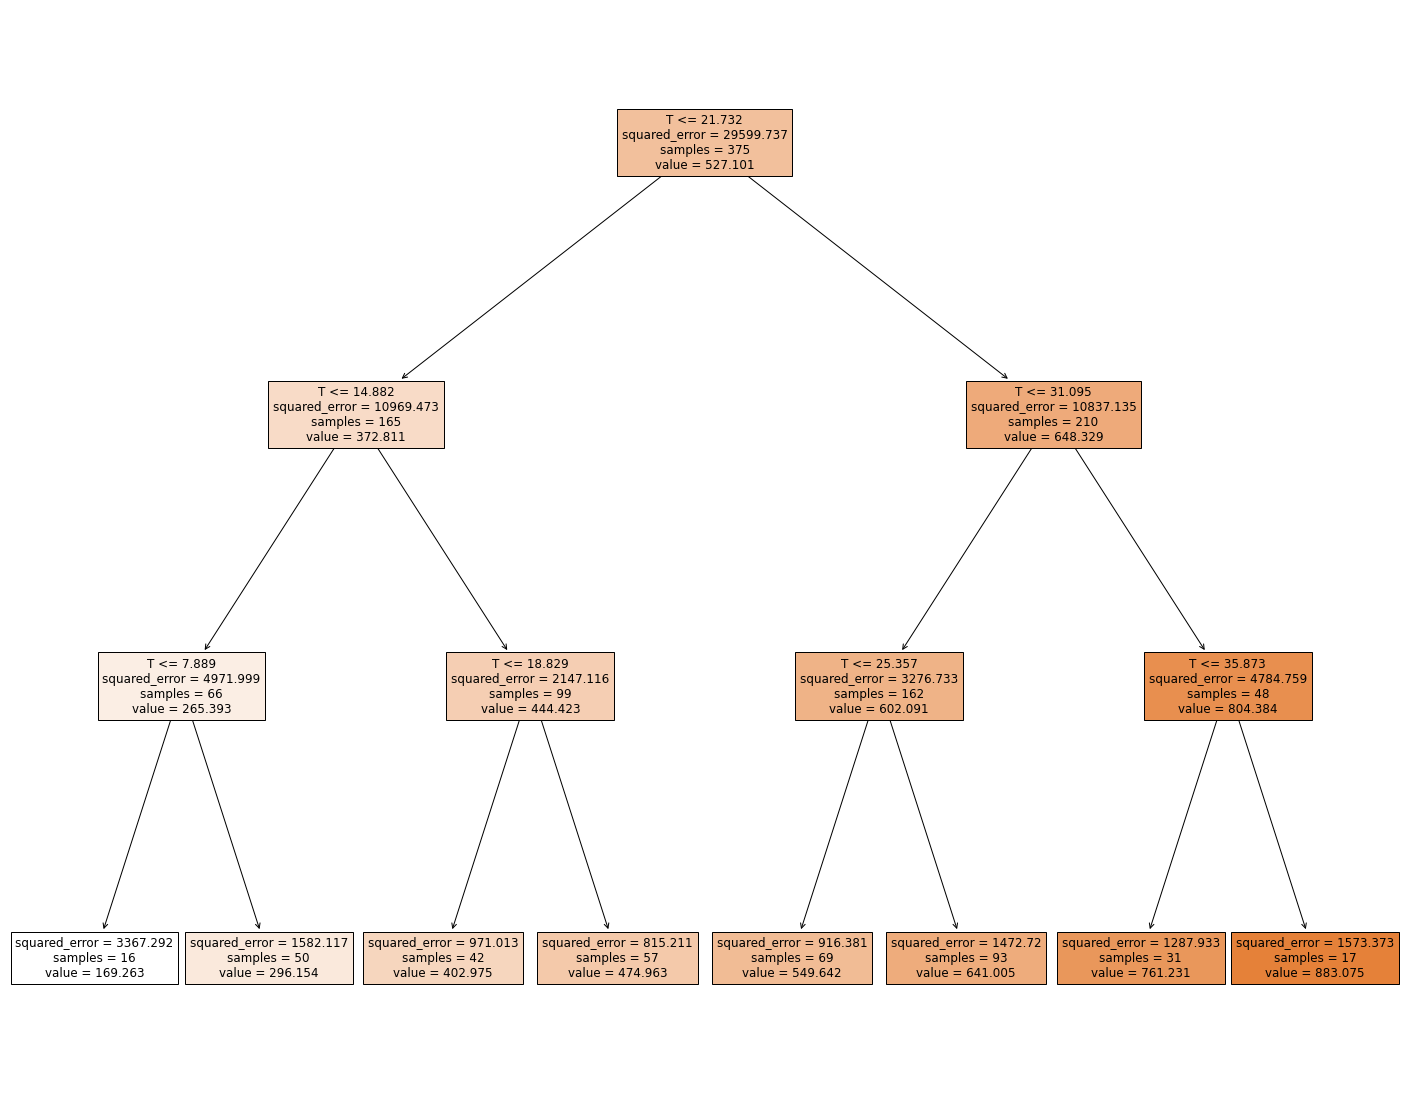

In [15]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(DT_model, 
                   feature_names='Tempreture',  
                   class_names='Revenue',
                   filled=True)
fig.savefig("decistion_tree3.png")